In [1]:
import os
import json
import glob
import shutil
import cv2
from math import dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
degrees = ['15cm_0mm_0deg', '15cm_25mm_5deg', '15cm_50mm_10deg', '20cm_0mm_0deg', '20cm_25mm_5deg', '20cm_50mm_10deg']

In [3]:
result="../7_result"

figure = "../7_figure"
occlusion_result = "../9_occlusion_result"
occlusion_error = "../9_occlusion_localization_error"
occlusion_image= "../9_occlusion_image"

In [4]:
for ear_type in ear_types:
    names = os.listdir(os.path.join(result, ear_type))
    total = []
    for name in names:
        for deg in degrees:
            error_file = glob.glob(os.path.join(result, name, "error",deg,"*.csv"))[0]
            error_df = pd.read_csv(error_file, index_col = 0)

            interval = len(error_df) / 3
            temp = list(range(len(error_df)))
            index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]
            for i in index:
                total.append(error_df.iloc[i,:].to_numpy())



    total = np.array(total)
    total = total.reshape(-1)
    print(total.shape)      

    sorted_data_0 = np.sort(total*10)
    cumulative_prob_0 = np.arange(1, len(total) + 1) / len(total)
    plt.plot(sorted_data_0, cumulative_prob_0, label="The result of estimation without occlusion")
    plt.plot(sorted_data, cumulative_prob, label="The result of estimation with occlusion")
    plt.xlim(0, 10)
    plt.ylim(0, 1.1)
    plt.xlabel("mm")
    plt.ylabel("Probability")
    plt.title("CDF Comparison of Acupoint Estimation Error with Occlsuion")
    plt.legend()
    plt.show()
    



        
                
        
        

(4032,)


(4032,)


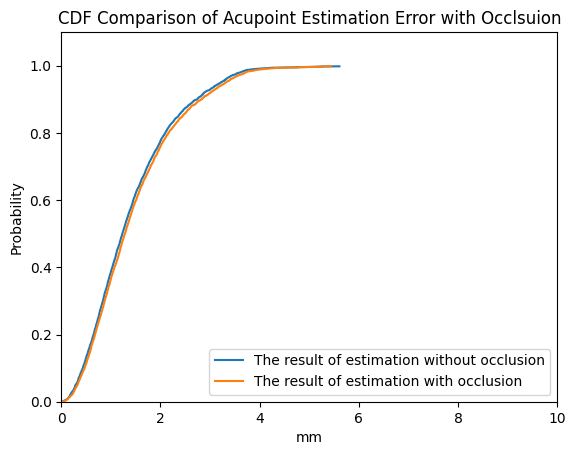

In [8]:
total = []
for name in names:
    for deg in degrees:
        error_file = glob.glob(os.path.join(occlusion_error, name,deg,"*.csv"))[0]
        error_df = pd.read_csv(error_file, index_col = 0)
        
        total.append(error_df.to_numpy())

total = np.array(total)
total = total.reshape(-1)
print(total.shape)      
    
sorted_data = np.sort(total*10)
cumulative_prob = np.arange(1, len(total) + 1) / len(total)
    
plt.plot(sorted_data_0, cumulative_prob_0, label="The result of estimation without occlusion")
plt.plot(sorted_data, cumulative_prob, label="The result of estimation with occlusion")
plt.xlim(0, 10)
plt.ylim(0, 1.1)
plt.xlabel("mm")
plt.ylabel("Probability")
plt.title("CDF Comparison of Acupoint Estimation Error with Occlsuion")
plt.legend()
plt.show()


In [4]:
without_bbox_result = "../mmpose/k_fold/result"
result="../keypoint"
ear_types=["free","attached"]

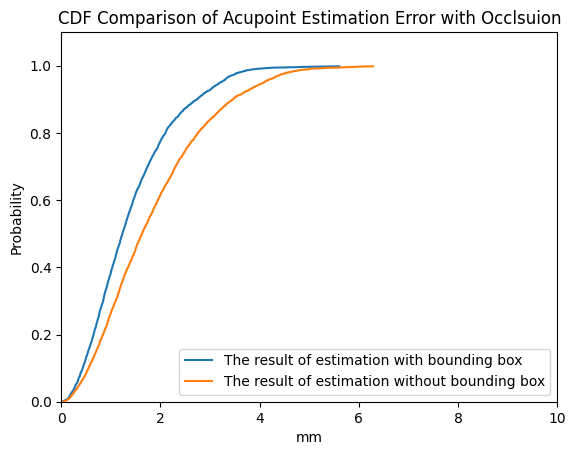

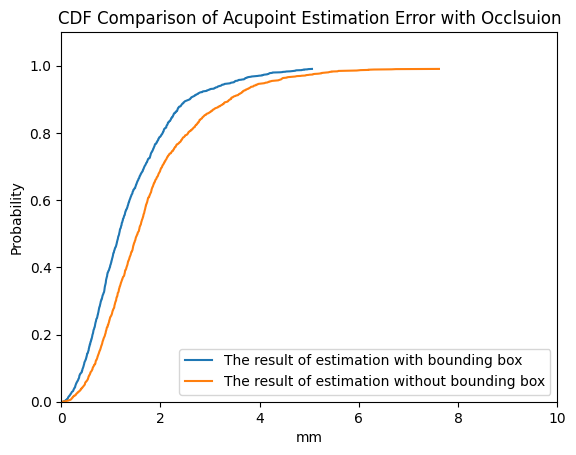

In [14]:
for ear_type in ear_types:
    without_bbox_total = []
    total = []
    names = os.listdir(os.path.join(without_bbox_result, ear_type))
    for name in names:
        for deg in degrees:
            error_file = glob.glob(os.path.join("../keypoint", ear_type, "7_result", name, "error", deg, "*.csv"))[0]
            without_bbox_error_file = glob.glob(os.path.join(without_bbox_result, ear_type, name, "error", deg, "*.csv"))[0]
            error_df = pd.read_csv(error_file, index_col = 0)
            without_bbox_error_df = pd.read_csv(without_bbox_error_file, index_col = 0)
            

            interval = len(error_df) / 3
            temp = list(range(len(error_df)))
            index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]
            for i in index:
                total.append(error_df.iloc[i,:].to_numpy())
                without_bbox_total.append(without_bbox_error_df.iloc[i,:].to_numpy())

    total = np.array(total)
    without_bbox_total = np.array(without_bbox_total)
    total = total.reshape(-1)
    without_bbox_total = without_bbox_total.reshape(-1)
    

    sorted_total = np.sort(total*10)
    sorted_without_bbox_total = np.sort(without_bbox_total*10)
    cumulative_prob_total = np.arange(1, len(total) + 1) / len(total)
    cumulative_prob_without_bbox_total = np.arange(1, len(without_bbox_total) + 1) / len(without_bbox_total)
    
    
    plt.plot(sorted_total, cumulative_prob_total, label="The result of estimation with bounding box")
    plt.plot(sorted_without_bbox_total, cumulative_prob_without_bbox_total, label="The result of estimation without bounding box")
    plt.xlim(0, 10)
    plt.ylim(0, 1.1)
    plt.xlabel("mm")
    plt.ylabel("Probability")
    plt.title("CDF Comparison of Acupoint Estimation Error with Occlsuion")
    plt.legend()
    plt.show()
